In [1]:
# 7. Половые связи и доход
# Гипотеза: существует связь между количеством половых партнёров за жизнь и уровнем дохода
# Дополнительный анализ:
#     - Добавить вредные привычки (курение, алкоголь) как признаки импульсивного поведения и низкого уровня самоконтроля


# Библиотеки

In [2]:
from dataframes import dataframes # словарь датафреймов, ключи: 2010, 2012, 2014, 2016, 2018, 2021, 2022.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Базовые цвета:
# красный 0, 
# оранжевый 1,
# желтый 2, 
# зеленый 3, 
# голубой 4, 
# синий 5, 
# фиолетовый 6, 
# ярко-розовый(пурпурная пицца:)) 7, 
# черный 8, 
# белый 9, 
# серый 10
colors = ["#FF0000", "#ffa400", "#fff300", "#00FF00", "#00deff", "#002fff", "#8900ff", "#ff00d1", "#000000", "#ffffff", "#757575"]

#Градиенты:
red_grad = ["#ff7575", "#FF0000", "#8a0000"]

orange_grad = ["#ffd280", "#ffa400", "#855500"]

yellow_grad = ["#fff97a", "#fff300", "#8a8300"]

green_grad = ["#70ff70", "#00FF00", "#008000"]

cyan_grad = ["#99f2ff", "#00deff", "#007385"]

blue_grad = ["#708bff", "#002fff", "#00146b"]

purple_grad = ["#c98aff", "#8900ff", "#c98aff"]

Необходимые переменные для 2010 - 2022 гг:
- "realrinc" - доход в числе
- "sex" - пол
- "nummen" - количество половых партнеров-мужчин
- "numwomen" - количество половых партнеров-женщин.

Доп. переменные для 2022 года в отдельный датафрейм:
- "smokeday" - как много сигарет в день выкуривает 
- "drinkday1" - как часто выпивает 4 или более порций алкоголя за один день

# Создание датафреймов

In [3]:
columns_to_extract = ['realrinc', 'sex', 'nummen', 'numwomen'] # Влияние курения и алкоголя можно проследить только для 2022 года - 'drinkday1', 'smokeday'

dfs_list = []

for year, df in dataframes.items():
    
    if all(col in df.columns for col in columns_to_extract):
        
        selected = df[columns_to_extract].copy()
        selected['year'] = year
        dfs_list.append(selected)
    else:
        print(f"В датафрейме за {year} отсутствуют некоторые столбцы")

# Объединяем все датафреймы в один
df = pd.concat(dfs_list, ignore_index=True)
df.head()

# подсчет количества чистых строк (без NaN)
sum_nan = 0
sum_str = 0
nan_rows_count = df.isna().any(axis=1).sum()
print(f"Количество строк с NaN: {nan_rows_count}")
print(f"Количество строк: {df.shape[0]}")
sum_nan += nan_rows_count
sum_str += df.shape[0]
print(sum_str - sum_nan)

# очистка строк с NaN
df.dropna(inplace=True)

# Проверка на пропуски
print("Пропуски:")
print(df.isnull().sum())

# Просто проверка
sum_nan = 0
sum_str = 0
nan_rows_count = df.isna().any(axis=1).sum()
print(f"Количество строк с NaN после очистки: {nan_rows_count}")
print(f"Количество строк: {df.shape[0]}")
sum_nan += nan_rows_count
sum_str += df.shape[0]
print(sum_str - sum_nan)

Количество строк с NaN: 12472
Количество строк: 19952
7480
Пропуски:
realrinc    0
sex         0
nummen      0
numwomen    0
year        0
dtype: int64
Количество строк с NaN после очистки: 0
Количество строк: 7480
7480


In [4]:
df.head()

,realrinc,sex,nummen,numwomen,year
0,42735.0,1.0,0.0,20.0,2010
1,3885.0,2.0,5.0,0.0,2010
19,42735.0,1.0,20.0,20.0,2010
20,28490.0,1.0,0.0,997.0,2010
24,34965.0,2.0,2.0,0.0,2010


Датафрейм для  2022 гг

In [5]:


#df2021 = dataframes['2021'][['realrinc', 'sex', 'nummen', 'numwomen', 'drinkday1', 'smokeday' ]].copy() # в 2021 году реально нет
df2 = dataframes['2022'][['realrinc', 'sex', 'nummen', 'numwomen', 'drinkday1', 'smokeday' ]].copy()

#ddd = [df2021, df2022]
#df2 = pd.concat(ddd, ignore_index=True)
# подсчет количества чистых строк (без NaN)
sum_nan = 0
sum_str = 0
nan_rows_count = df2.isna().any(axis=1).sum()
print(f"Количество строк с NaN: {nan_rows_count}")
print(f"Количество строк: {df2.shape[0]}")
sum_nan += nan_rows_count
sum_str += df2.shape[0]
print(sum_str - sum_nan)

# очистка строк с NaN
df2.dropna(inplace=True)

# Проверка на пропуски
print("Пропуски:")
print(df2.isnull().sum())

# Просто проверка
sum_nan = 0
sum_str = 0
nan_rows_count = df2.isna().any(axis=1).sum()
print(f"Количество строк с NaN после очистки: {nan_rows_count}")
print(f"Количество строк: {df2.shape[0]}")
sum_nan += nan_rows_count
sum_str += df2.shape[0]
print(sum_str - sum_nan)

Количество строк с NaN: 3476
Количество строк: 4149
673
Пропуски:
realrinc     0
sex          0
nummen       0
numwomen     0
drinkday1    0
smokeday     0
dtype: int64
Количество строк с NaN после очистки: 0
Количество строк: 673
673


In [6]:
# dataframes['2021'].smokeday

# Корректировка данных в столбцах

In [7]:

df['sex'] = (df['sex'] == 2).astype(int)
print(df.nummen.unique())
print(df.numwomen.unique())
df.numwomen.astype(int)
df.nummen.astype(int)
df['numsex'] = df['nummen'] + df['numwomen']
df.head()

[  0.   5.  20.   2.   6.  15.   4.  10.   1.   8.   3.  25.  11.  27.
  48.   7.  30.  34.  24.  18.  12.  13.  16.  40.  35.  14. 100.  50.
  75.   9.  36.  80. 200. 995. 991.  60.  17.  28.  33.  45. 300.  21.
 996.  22.  23.  83. 150.  32. 993.  55.  38. 125. 365. 997.  65.  57.
  26.  62. 140.  70. 989. 120. 123.  43.  88.]
[ 20.   0. 997.  80.  10.   5.   4.   7.  40.   1.   2.   3.  22.  50.
  25. 100.   9.   8.  21.   6.  13.  30.  15.  16.  12.  24.  11. 991.
  35.  32. 750.  45. 200.  26. 150.  17.  70.  14.  36.  60. 400.  34.
  19.  27. 127. 994.  23. 989.  74.  28. 996.  18.  65. 250.  75. 995.
  87.  52.  90.  29. 120. 222. 300. 125.  41.  33.  73.  96.  55. 500.
  31. 115. 255. 140.  42.  88. 993. 132.  58. 311. 110. 105. 123.  62.
 205.  85.  43. 700.]


,realrinc,sex,nummen,numwomen,year,numsex
0,42735.0,0,0.0,20.0,2010,20.0
1,3885.0,1,5.0,0.0,2010,5.0
19,42735.0,0,20.0,20.0,2010,40.0
20,28490.0,0,0.0,997.0,2010,997.0
24,34965.0,1,2.0,0.0,2010,2.0


In [8]:
print(df2.smokeday.unique())
print(df2.drinkday1.unique())
df2['sex'] = (df2['sex'] == 2).astype(int)
df2['smokeday'] = df2['smokeday'].astype(int)
df2['drinkday1'] = df2['drinkday1'].astype(int)
df2.numwomen.astype(int)
df2.nummen.astype(int)
df2['numsex'] = df2['nummen'] + df2['numwomen']
df2.head()

[2. 5. 1. 3. 6. 4. 7.]
[1. 2. 3. 4. 5.]


,realrinc,sex,nummen,numwomen,drinkday1,smokeday,numsex
0,40900.0,1,25.0,0.0,1,2,25.0
2,18405.0,1,6.0,0.0,1,5,6.0
5,22495.0,0,0.0,15.0,1,1,15.0
6,15337.5,1,34.0,0.0,1,1,34.0
7,33742.5,0,0.0,5.0,1,1,5.0


# Немного описательной статистики

In [9]:
print(df.describe())
print(df2.describe())

            realrinc          sex       nummen     numwomen       numsex
count    7480.000000  7480.000000  7480.000000  7480.000000  7480.000000
mean    25090.881486     0.519652     9.504947    11.257754    20.762701
std     32365.302232     0.499647    73.104244    70.346052   103.334047
min       204.500000     0.000000     0.000000     0.000000     0.000000
25%      8175.000000     0.000000     0.000000     0.000000     2.000000
50%     17550.000000     1.000000     1.000000     1.000000     5.000000
75%     30645.000000     1.000000     4.000000     5.000000    10.000000
max    341672.379300     1.000000   997.000000   997.000000  1982.000000
            realrinc         sex      nummen    numwomen   drinkday1  \
count     673.000000  673.000000  673.000000  673.000000  673.000000   
mean    28438.189192    0.514116    3.487370    4.759287    1.667162   
std     32109.452110    0.500172    6.533583   14.378442    0.868980   
min       204.500000    0.000000    0.000000    0.00000

# Некоторые графики

C:\Users\Hroft\AppData\Local\Temp\ipykernel_17648\3802733681.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(df['realrinc'], rotation=45, ha='right')


<Figure size 1400x600 with 0 Axes>

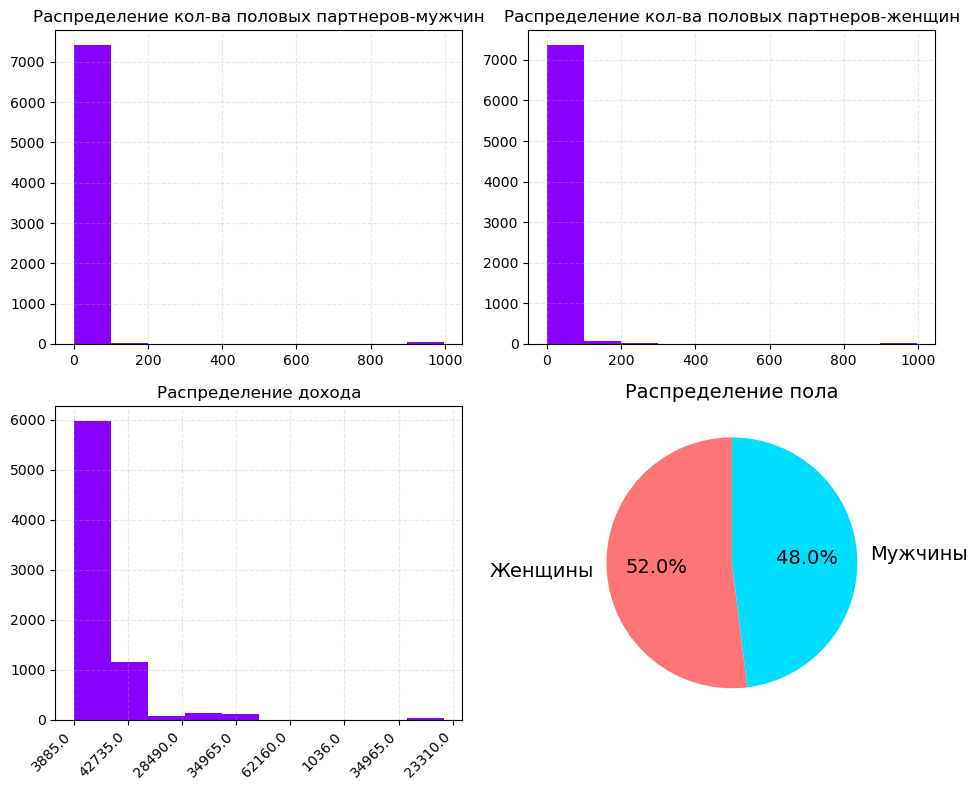

In [10]:
plt.figure(figsize=(14, 6))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].hist(df['nummen'], color = purple_grad[1])
axes[0, 0].set_title("Распределение кол-ва половых партнеров-мужчин")
axes[0, 0].grid(True, linestyle='--', alpha=0.3)

axes[0, 1].hist(df['numwomen'], color = purple_grad[1])
axes[0, 1].set_title("Распределение кол-ва половых партнеров-женщин")
#axes[0, 1].set_xticklabels(df['realrinc'], rotation=45, ha='right') 
axes[0, 1].grid(True, linestyle='--', alpha=0.3)

axes[1, 0].hist(df['realrinc'], color = purple_grad[1])
axes[1, 0].set_title("Распределение дохода")
axes[1, 0].set_xticklabels(df['realrinc'], rotation=45, ha='right') 
axes[1, 0].grid(True, linestyle='--', alpha=0.3)

category_counts = df['sex'].value_counts()
axes[1, 1].pie(category_counts,
        labels={"Женщины":1, "Мужчины": 0},  # Подписи секторов - названия категорий
        autopct='%1.1f%%',  # Формат процентов (один знак после запятой)
        startangle=90,  # Угол начала (90 градусов - вертикально вверх)
        colors=[red_grad[0], cyan_grad[1]],
        textprops={'fontsize': 14}) 
axes[1, 1].set_title('Распределение пола', fontsize = 14)  # Заголовок диаграммы
axes[1, 1].set_ylabel('') 


plt.tight_layout()
plt.show()


# Зависимость дохода от кол-ва партнеров у респондента для 2010 - 2022 годов:

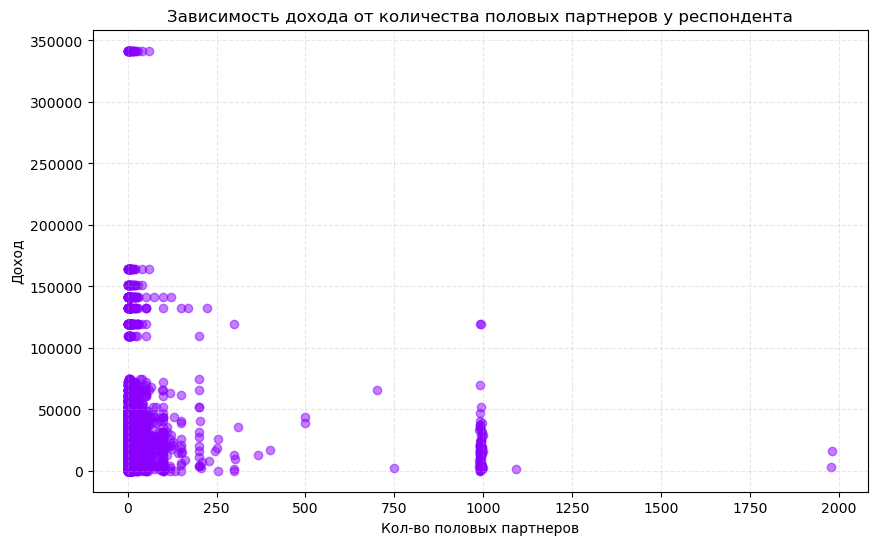

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['numsex'], df['realrinc'], alpha=0.5, color = purple_grad[1])  
plt.title('Зависимость дохода от количества половых партнеров у респондента')
plt.xlabel('Кол-во половых партнеров')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Ящик с усами

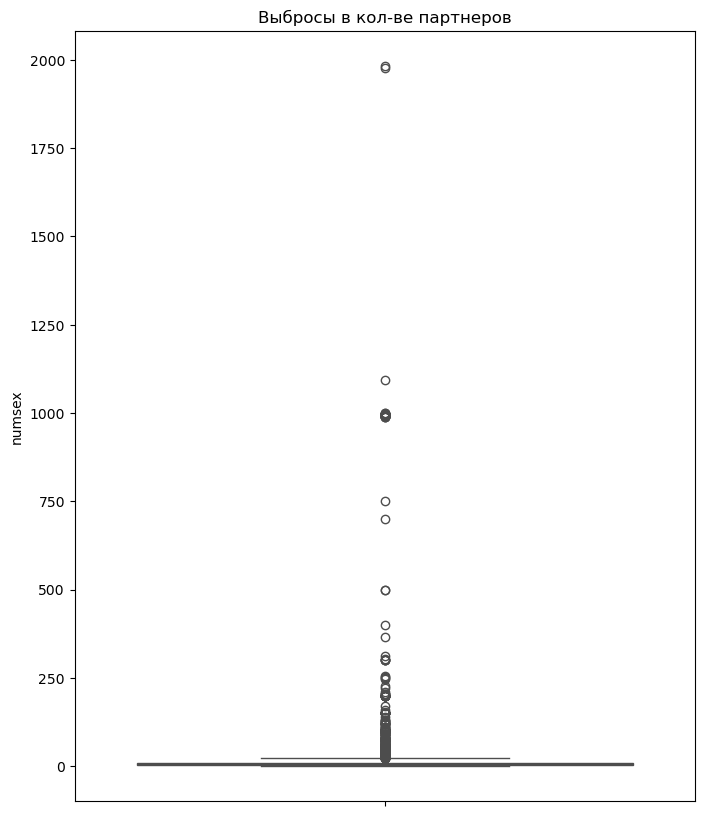

In [12]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df['numsex'], color = purple_grad[1])
plt.title('Выбросы в кол-ве партнеров')
plt.show()

В таком случае данный график неинформативен. Межквантильный размах мал, а максимальное значение 1982 партнера.

# Проверим перцентили

In [13]:
print(df['numsex'].describe(percentiles=[0.9, 0.95, 0.99, 0.999]))

count    7480.000000
mean       20.762701
std       103.334047
min         0.000000
50%         5.000000
90%        25.000000
95%        50.000000
99%       500.000000
99.9%     997.000000
max      1982.000000
Name: numsex, dtype: float64


Исходя из перцентилей, было принято решение удалить из датафрейма все строки, в которых количество половых партнеров превышает 50 человек.

In [14]:
df = df[df['numsex'] <= 50]

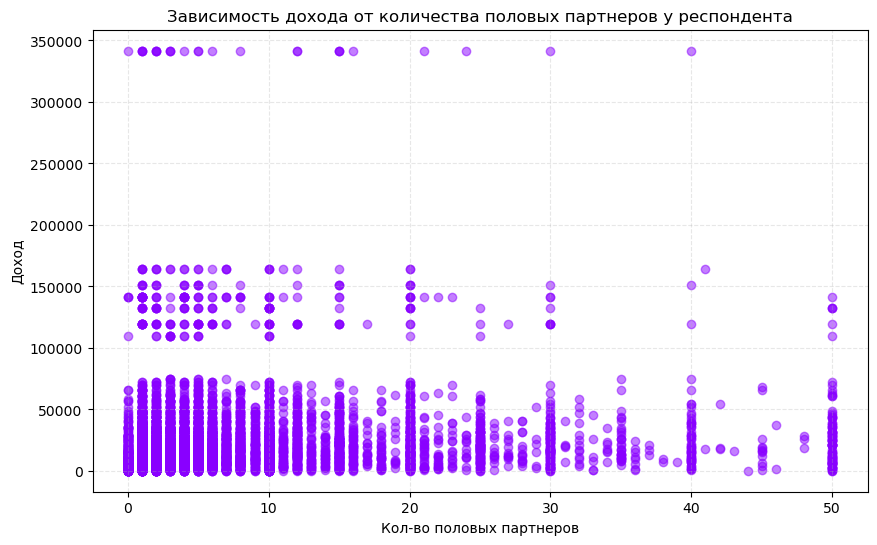

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['numsex'], df['realrinc'], alpha=0.5, color = purple_grad[1])  
plt.title('Зависимость дохода от количества половых партнеров у респондента')
plt.xlabel('Кол-во половых партнеров')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

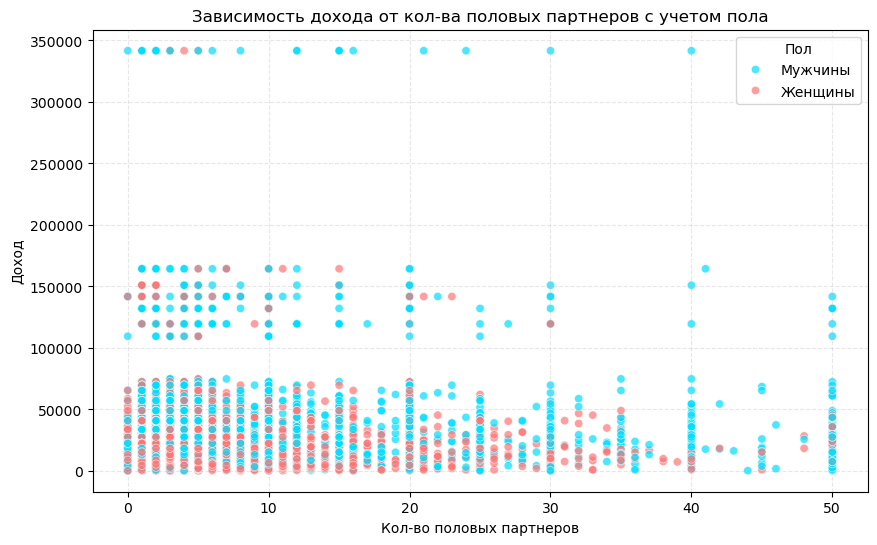

In [16]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='numsex', 
    y='realrinc', 
    hue='sex', 
    data=df, 
    alpha=0.7,
    palette={0: cyan_grad[1], 1: red_grad[0]},
)
plt.title('Зависимость дохода от кол-ва половых партнеров с учетом пола')
plt.xlabel('Кол-во половых партнеров')
plt.ylabel('Доход')

handles, _ = scatter.get_legend_handles_labels()
new_labels = ['Мужчины', 'Женщины']
plt.legend(handles=handles, labels=new_labels, title='Пол')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Для 2022 года с курением и алкоголем:

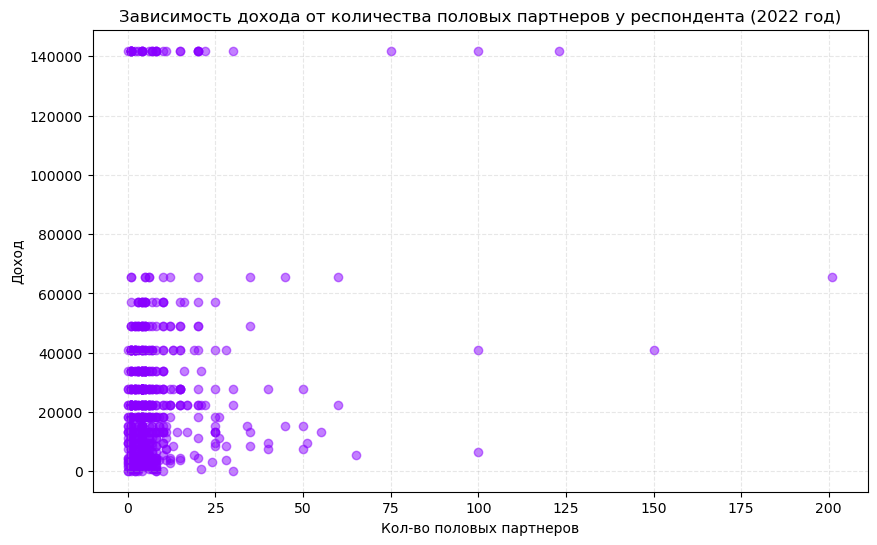

In [17]:
# датафрейм - df2

plt.figure(figsize=(10, 6))
plt.scatter(df2['numsex'], df2['realrinc'], alpha=0.5, color = purple_grad[1])  
plt.title('Зависимость дохода от количества половых партнеров у респондента (2022 год)')
plt.xlabel('Кол-во половых партнеров')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Перцентили

In [18]:
print(df2['numsex'].describe(percentiles=[0.9, 0.95, 0.99, 0.999]))

count    673.000000
mean       8.246657
std       15.057185
min        0.000000
50%        4.000000
90%       17.000000
95%       25.400000
99%       67.800000
99.9%    166.728000
max      201.000000
Name: numsex, dtype: float64


In [19]:
# Оставим только строки с кол-вом партнеров <=67
df2 = df2[df2['numsex'] <= 67]

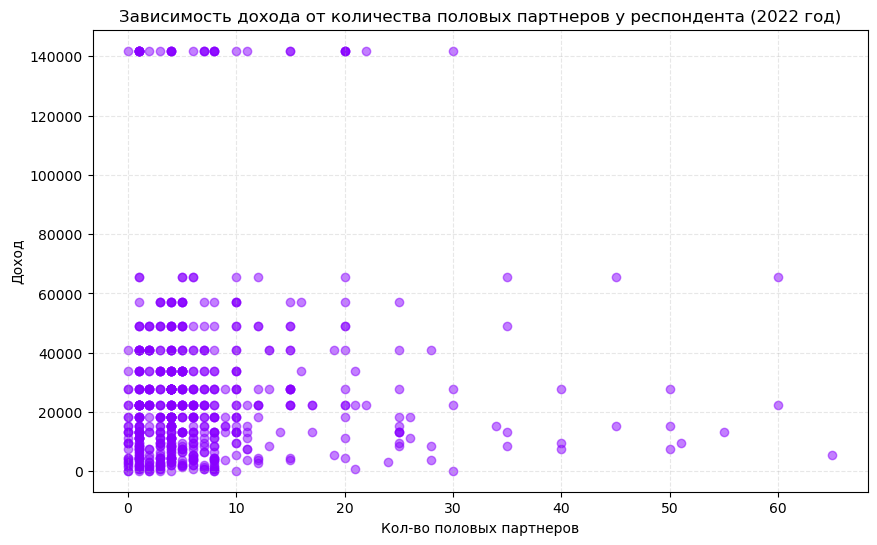

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['numsex'], df2['realrinc'], alpha=0.5, color = purple_grad[1])  
plt.title('Зависимость дохода от количества половых партнеров у респондента (2022 год)')
plt.xlabel('Кол-во половых партнеров')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

<Figure size 1400x600 with 0 Axes>

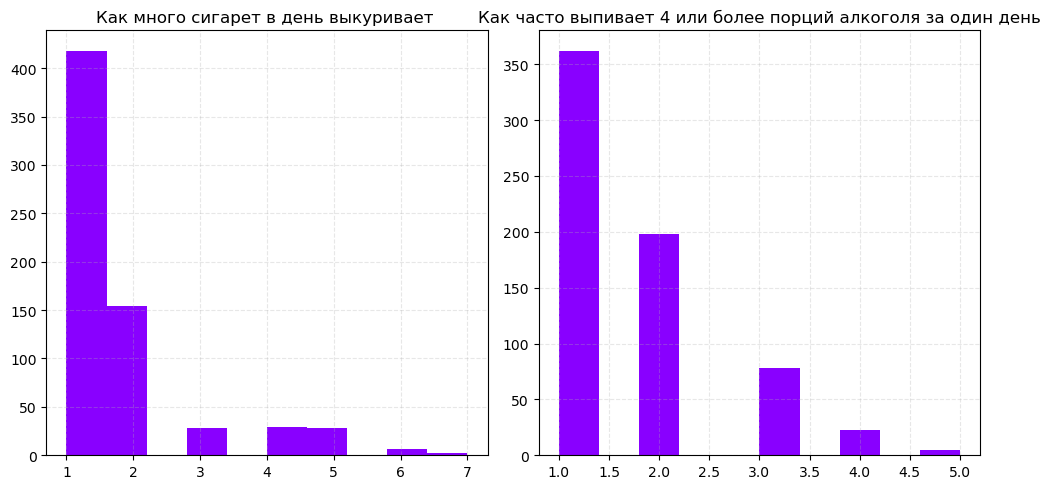

In [21]:
plt.figure(figsize=(14, 6))
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

axes[0].hist(df2['smokeday'], color = purple_grad[1])
axes[0].set_title("Как много сигарет в день выкуривает ")
axes[0].grid(True, linestyle='--', alpha=0.3)

axes[1].hist(df2['drinkday1'], color = purple_grad[1])
axes[1].set_title("Как часто выпивает 4 или более порций алкоголя за один день")
axes[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Аналитика

Построим модель зависимости дохода от количества половых партнёров за жизнь

In [22]:
import statsmodels.api as sm

In [23]:
X = df['numsex'].values.reshape(-1, 1)
y = df['realrinc'].values

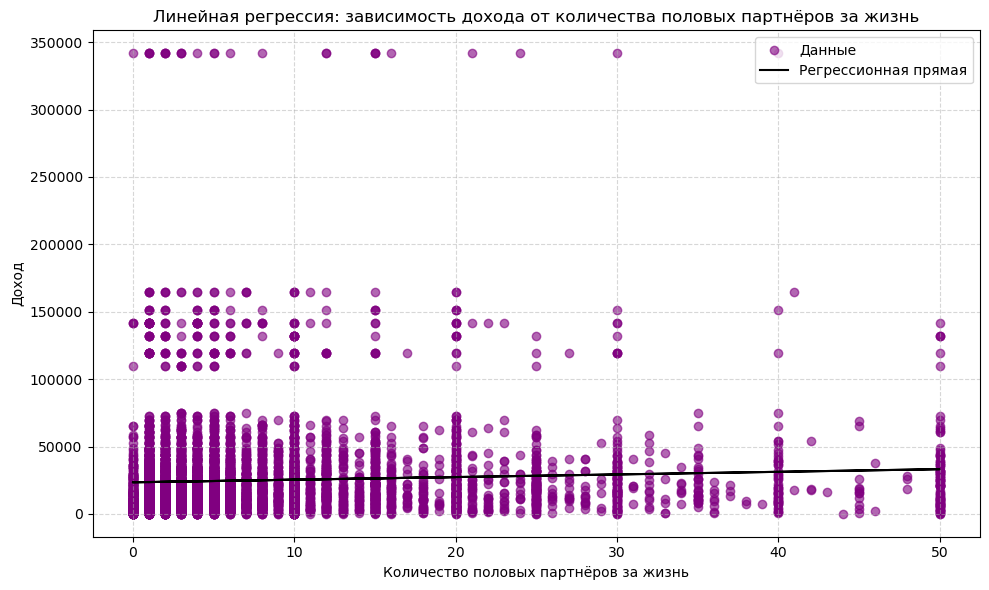

In [24]:
X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

y_pred = model_sm.predict(X_sm)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', alpha=0.6, label='Данные')
plt.plot(X, y_pred, color='black', label='Регрессионная прямая')

plt.xlabel('Количество половых партнёров за жизнь')
plt.ylabel('Доход')
plt.title('Линейная регрессия: зависимость дохода от количества половых партнёров за жизнь')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Как видим по графику зависимость не наблюдается.  
Рассмотрим характериситики модели.

In [25]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.51
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.27e-06
Time:                        17:16:09   Log-Likelihood:                -85009.
No. Observations:                7204   AIC:                         1.700e+05
Df Residuals:                    7202   BIC:                         1.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.348e+04    494.294     47.504      0.0

Как видим F-статистика и R-квадрат крайне низкие, что говорит о почти полном отсутствии качества модели.

Поскольку данные по курению и алкоголю ограничены двадцать вторым годом, рассмотрим их отдельно.

Построим модель для курения.

In [26]:
X = df2['smokeday'].values.reshape(-1, 1)
y = df2['realrinc'].values

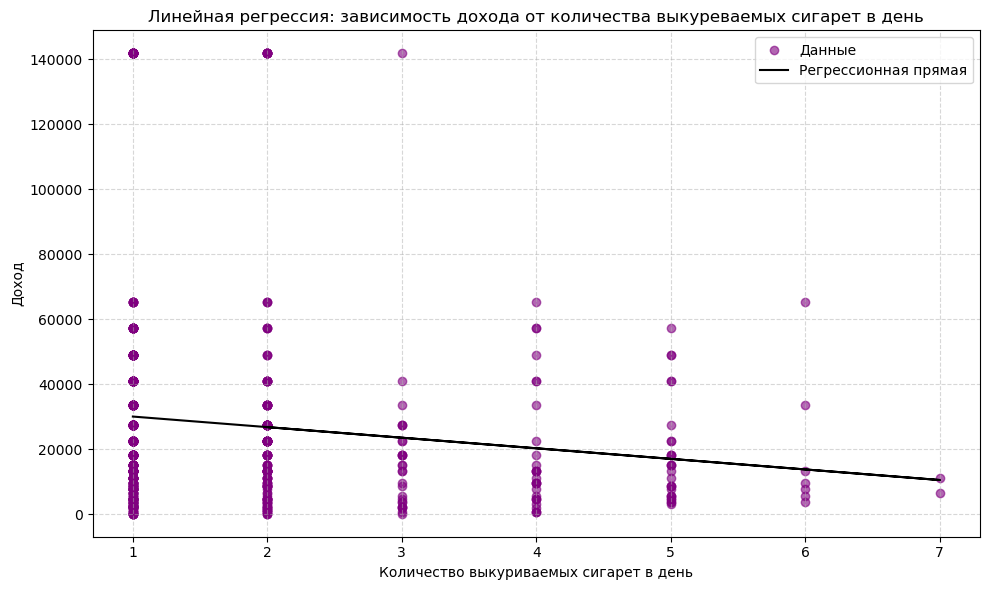

In [27]:
X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

y_pred = model_sm.predict(X_sm)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', alpha=0.6, label='Данные')
plt.plot(X, y_pred, color='black', label='Регрессионная прямая')

plt.xlabel('Количество выкуриваемых сигарет в день')
plt.ylabel('Доход')
plt.title('Линейная регрессия: зависимость дохода от количества выкуреваемых сигарет в день')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Судя по линии регрессии, наблюдается связь между количеством выкуриваемых сигарет в день и заработком, а именно чем больше выкуриваемых сигарет в день, тем меньше заработок.  
Рассмотрим характеристики модели.

In [28]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     9.962
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00167
Time:                        17:16:10   Log-Likelihood:                -7833.8
No. Observations:                 666   AIC:                         1.567e+04
Df Residuals:                     664   BIC:                         1.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.335e+04   2114.175     15.774      0.0

Как видим, R-квадрат у модели крайне низкий, что говорит об очень слабой предсказательной способности модели.  
Добавим к модели в качестве признака алкоголь.  

In [29]:
X = df2[['smokeday', 'drinkday1']]
y = df2['realrinc']

In [30]:
X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

In [31]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.993
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00704
Time:                        17:16:10   Log-Likelihood:                -7833.7
No. Observations:                 666   AIC:                         1.567e+04
Df Residuals:                     663   BIC:                         1.569e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.294e+04   2984.226     11.037      0.0

Как видим, модель также получается очень некачественная - R-квадрат очень низкий, а признак количества выпитого алкоголя не является значимым.

# Выводы

- Зависимость дохода от количества лет образоавния не наблюдается.  
- Зависимость дохода от курения есть, но она очень незначительная.  
- Зависимость дохода почти отсутствует.